# INF209B - Visão Computacional

## Prática 03 -Identificação de Bordas e Segmentação de Objetos - v01


### Bruno Monserrat Perillo           


## Resumo


Este relatório foi desenvolvido na disciplina de Visão Computacional da UFABC, ministrada pelo Prof. Dr. Filipe Ieda Fazanaro. Estando dividido em 02 partes. São apresentados os códigos executados e em seguida as devidas respostas. Para tal, foi utilizado o Jupyter Notebook para execução do Python 3.7.7 e OpenCV 4.2.0. Foram realizados uma série de experimentos básicos de identificação de bordas pelos método Laplaciano e Canny, bem como segmentação de objetos pelo algoritmo *watershed*.

## Metodologia

Neste trabalho foi realizado 2 exercícios de práticos de processamento de imagens. Para isto, foi utilizado o OpenCV 4.2.0 através Jupyter Notebook onde foi executado o python 3.7.7. A escolha pelo Jupyter Notebook se deu devido a facilidade dos testes.

## Resultados
Nesta seção são apresentados os scripts e resultados obtidos.

### 1) 
>Elabore um programa que carrega a sua foto - aquela mesma obtida nas aulas anteriores - e realiza a detecção de bordas pelo método Laplaciano e pelo método Canny. O programa deve mostrar a foto original, as bordas e uma terceira imagem que sobrepõe a original e as bordas. Use imagens coloridas e em escala de cinza. Compare os resultados.

Uma das tarefas mais importantes para a visão computacional é identificar objetos. Para essa identificação uma das principais técnicas é a utilização de detectores de bordas a fim
de identificar os formatos dos objetos presentes na imagem.



Os algoritmos mais comuns são o Canny, Sobel e Laplaciano. Basicamente nestes e em outros métodos a detecção de
bordas se faz através de identificação do gradiente, ou, neste caso, de variações abruptas na intensidade dos pixels de uma região da imagem.

O OpenCV disponibiliza a implementação de 3 filtros de gradiente: Sobel, Scharr e Laplacian. As respectivas funções são: cv.Sobel(), cv.Scharr(), cv.Laplacian(). O método Sobel é direcional, então temos que juntar o filtro horizontal e o vertical para ter uma transformação completa. O filtro Laplaciano não exige processamento individual horizontal e vertical como o Sobel. 
O detector de bordas Canny, cv.Canny(), se utiliza de várias outras técnicas como o Sobel e realiza multiplos passos para chegar ao resultado final.

### a) Imagem colorida

In [42]:
#importando bibliotecas e montando drive
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline  

A seguir são apresentados os filtros de gradiente, Laplaciano e Sobel.

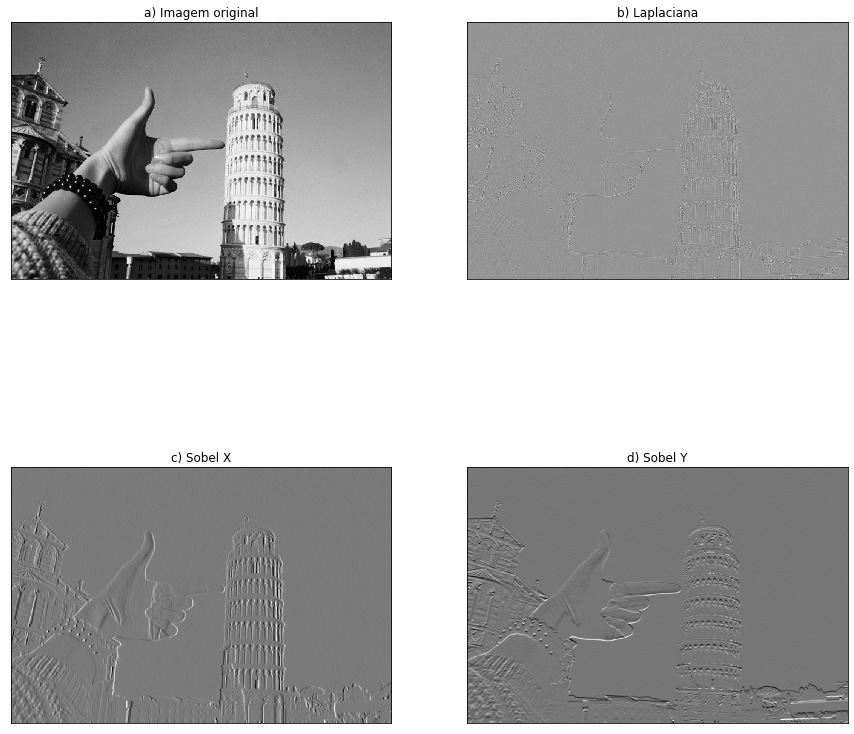

In [78]:
# Carregando imagem
img = cv.imread('G:\Meu Drive\Colab\TorrePisa2.jpg')
# https://viagemeturismo.abril.com.br/blog/piacere-italia/como-visitar-a-torre-di-pisa-na-toscana/

# Convertendo para escala de cinza
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  

# Filtros de gradiente
laplacian = cv.Laplacian(img,cv.CV_64F)      # 2ª derivada
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5) # 1ª derivada em x
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5) # 1ª derivada em y

plt.figure(figsize = (15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('a) Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('b) Laplaciana'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('c) Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('d) Sobel Y'), plt.xticks([]), plt.yticks([])

# Mostra na tela
plt.show();

_Figura 1:_ Resultado obtido pela implementação do código anterior. a) Imagem original, b) Filtro Laplaciano, c) Sobel X e em d) Sobel Y

Detector Canny

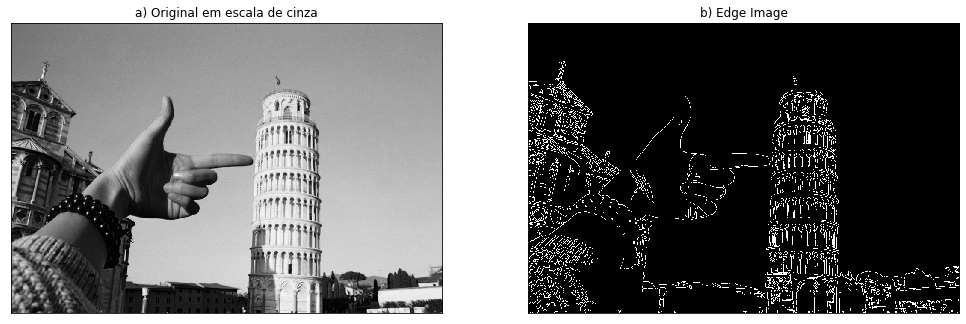

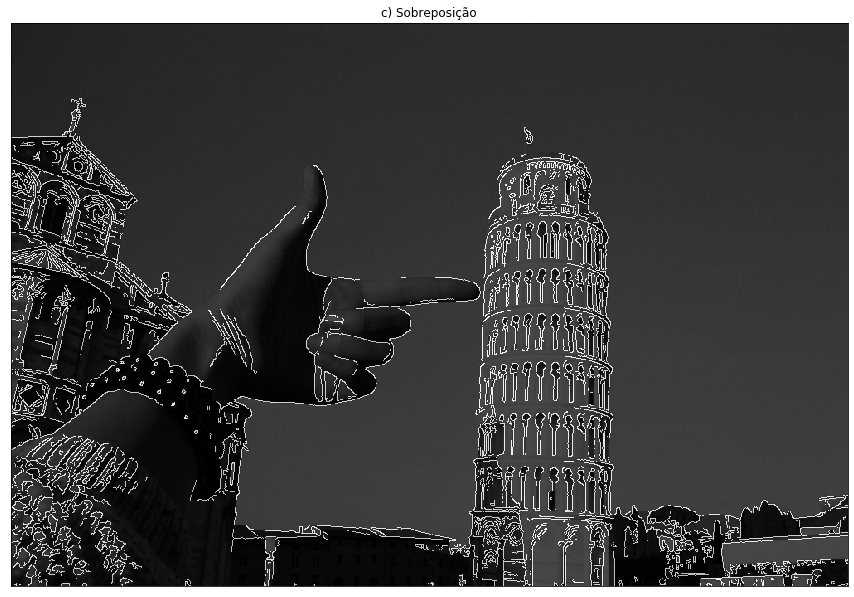

In [79]:
img = cv.imread('G:\Meu Drive\Colab\TorrePisa2.jpg')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

edges = cv.Canny(img,100,200)
dst = cv.addWeighted(img, 0.3, edges, 0.7, 0)

plt.figure(figsize = (17,17))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('a) Original em escala de cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('b) Edge Image'), plt.xticks([]), plt.yticks([])
plt.show();
plt.figure(figsize = (15,15))
plt.imshow(dst,cmap = 'gray')
plt.title('c) Sobreposição'), plt.xticks([]), plt.yticks([])
plt.show();

_Figura 2:_ Resultado obtido pela implementação do código anterior. a) Imagem original em escala de cinza, b) Canny com limiar (100,200) e em c) Sobreposição de (a) e (b)

### a) Imagem em escala de cinza

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


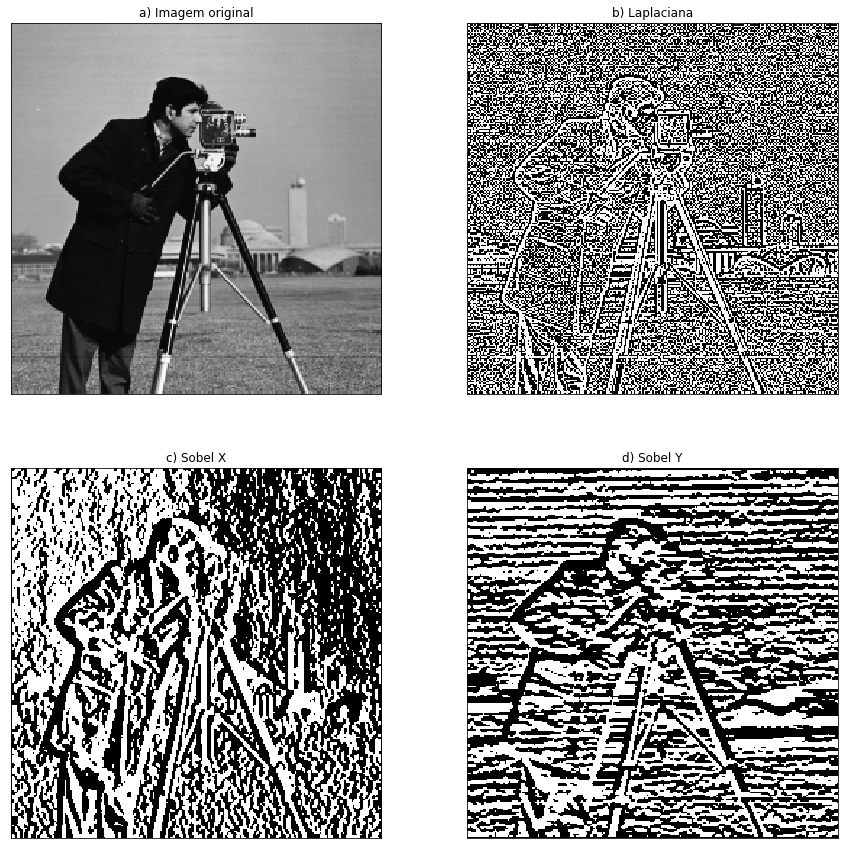

In [83]:
# Carregando imagem
img = cv.imread('G:\Meu Drive\Colab\cameraman.tif')
# https://viagemeturismo.abril.com.br/blog/piacere-italia/como-visitar-a-torre-di-pisa-na-toscana/

# Filtros de gradiente
laplacian = cv.Laplacian(img,cv.CV_64F)      # 2ª derivada
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5) # 1ª derivada em x
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5) # 1ª derivada em y

plt.figure(figsize = (15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('a) Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('b) Laplaciana'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('c) Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('d) Sobel Y'), plt.xticks([]), plt.yticks([])

# Mostra na tela
plt.show();

_Figura 3:_ Resultado obtido pela implementação do código anterior. a) Imagem original, b) Filtro Laplaciano, c) Sobel X e em d) Sobel Y

Detector Canny

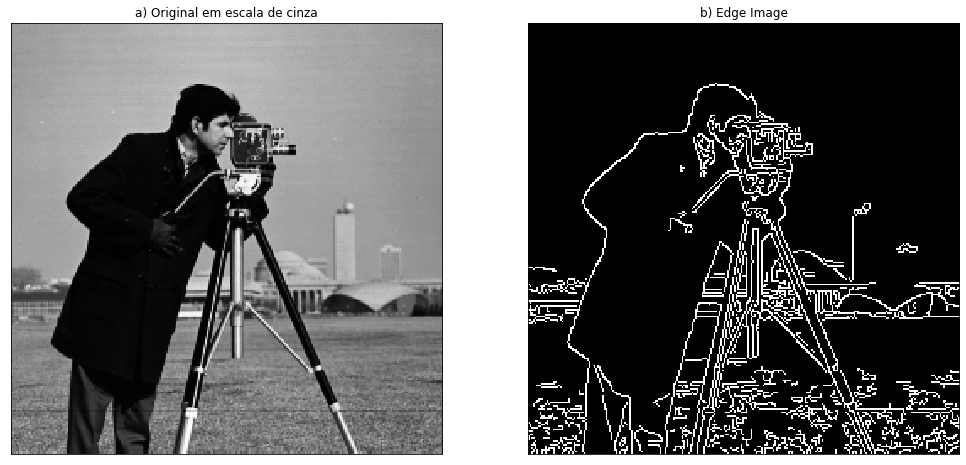

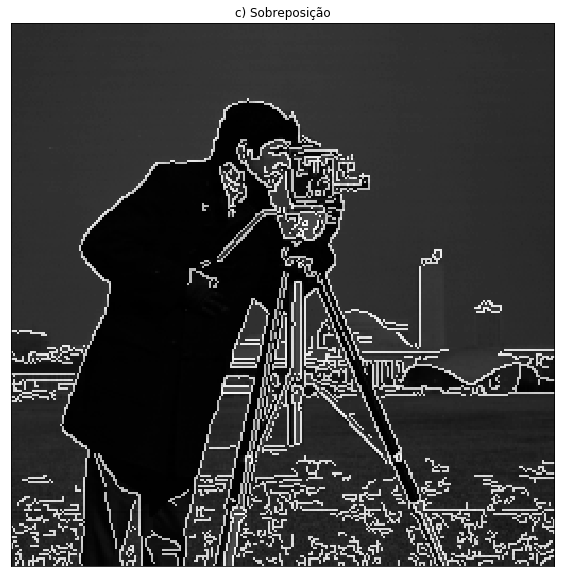

In [85]:
img = cv.imread('G:\Meu Drive\Colab\cameraman.tif')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

edges = cv.Canny(img,100,200)
dst = cv.addWeighted(img, 0.3, edges, 0.7, 0)

plt.figure(figsize = (17,17))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('a) Original em escala de cinza'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('b) Edge Image'), plt.xticks([]), plt.yticks([])
plt.show();
plt.figure(figsize = (10,10))
plt.imshow(dst,cmap = 'gray')
plt.title('c) Sobreposição'), plt.xticks([]), plt.yticks([])
plt.show();

_Figura 4:_ Resultado obtido pela implementação do código anterior. a) Imagem original em escala de cinza, b) Canny com limiar (100,200) e em c) Sobreposição de (a) e (b)

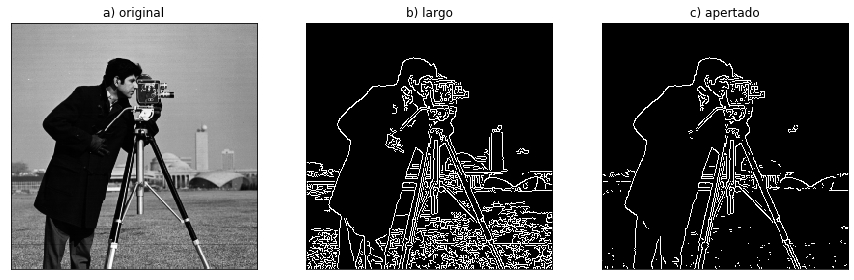

In [109]:
img = cv.imread('G:\Meu Drive\Colab\cameraman.tif')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

largo = cv.Canny(img, 10 , 200 )
apertado = cv.Canny(img, 225 , 250 )

plt.figure(figsize = (15,15))
plt.imshow(img,cmap = 'gray')

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('a) original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(largo,cmap = 'gray')
plt.title('b) largo'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(apertado, cmap = 'gray')
plt.title('c) apertado'), plt.xticks([]), plt.yticks([])
plt.show();

_Figura 5:_ Resultado obtido pela implementação do código anterior. a) Imagem original em escala de cinza, b) Canny com limiar (10,200) e em c) Canny com limiar (225,250)

## Discussão / Conclusão - Exercício 1

Este relatório prático foi realizado como meio de avaliação da disciplina de Visão Computacional. A prática foi dividida em duas partes.

Na primeira parte, foi investigado os conceitos de gradiente e borda atrvés do método de Sobel, Lapaciano e Canny. Foram utilizadas algumas figuras coloridas e em escala de cinza. 
Nas imagens coloridas, o método Sobel apresentou melhores resultados. Além disso, é possível notar que a Sobel horizontal acentua as linhas na vertical e vice-versa.
Verificou-se que o método Laplaciano apresentou melhor resultado na figura em preto e branco. A determinação das arestas é omnidirecional, mas com alguma perda de resolução. De fato, Pode-se ver as ondulações correspondentes às arestas são mais moderadas. O detector de bordas laplaciano é extremamente sensível a ruído, isto está intrinsecamente ligado ao fato de ser baseado em 2ª derivada.

Foi empregado também o detector Canny, apresentando boa detecção e minimizando efeitos de ruídos. Verificou-se a influência do limiar no detector Canny. No limiar amplo, Fig. 5b, observou-se uma grande ruidosa oriunda das construções visto na Fig. 5a.

### 2)
> Elabore um programa, utilizando o algoritmo watershed para realizar testes de segmentação em diversas imagens.
Imagens: imagens obtidas do vídeo na primeira prática; rice.png, cameraman.tif, peppers.png

# Coins

In [91]:
#importando bibliotecas e montando drive
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline  

Primeiro carregamos nossa imagem, convertemos em escala de cinza e a limitamos com um valor adequado. Utilizou-se a binarização de Otsu, para encontrar o melhor valor limite.

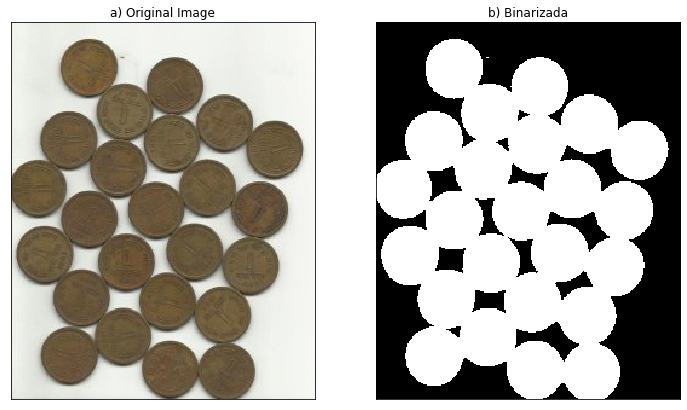

In [125]:
img = cv.imread('G:\Meu Drive\Colab\water_coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('a) Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('b) Binarizada'), plt.xticks([]), plt.yticks([])
plt.show()


_Figura 1:_ Resultado obtido pela implementação do código anterior. a) Imagem original e b) Binarização de Otsu.

Identificação do primeiro plano, marcando essa região com o valor 255. Na Fig. 1, já possímos uma imagem de limite binarizada. Então a região branca é erodida afim de comprovar que realmente pertence ao primeiro plano (Fig 2a). Para a região de fundo, foi aplicado a dilatação para que a imagem de fundo seja reduzida.

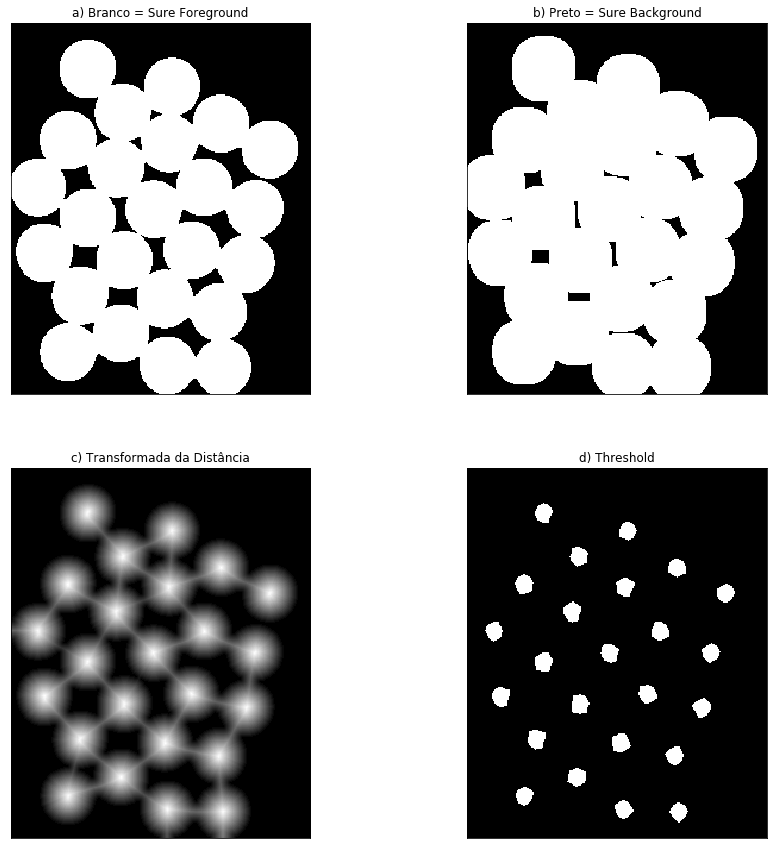

In [126]:
# noise removal
kernel = np.ones((3,3),np.uint8) #https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


plt.figure(figsize = (15,15))
plt.subplot(221),plt.imshow(opening, cmap = 'gray')
plt.title('a) Branco = Sure Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sure_bg, cmap = 'gray')
plt.title('b) Preto = Sure Background'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(dist_transform , cmap = 'gray')
plt.title('c) Transformada da Distância'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sure_fg, cmap = 'gray')
plt.title('d) Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

_Figura 2:_ Resultado obtido pela implementação do código anterior. a) Região do primeiro plano, b) Região de fundo, c) Transformada da distância e em d) limiar

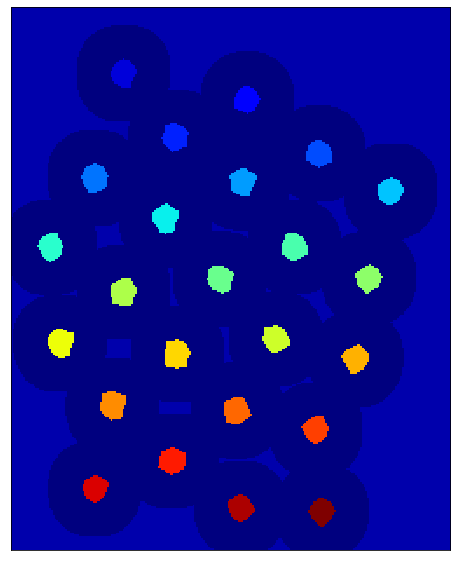

In [127]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.figure(figsize = (10,10))
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers,cmap='jet'), plt.xticks([]), plt.yticks([])
plt.show()

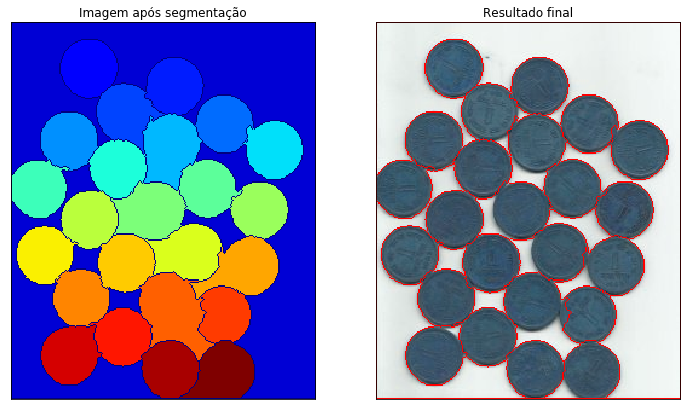

In [110]:
cv.watershed(img,markers)
img[markers == -1] = [255,0,0]


plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(markers, cmap = 'jet')
plt.title('Imagem após segmentação'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Resultado final'), plt.xticks([]), plt.yticks([])
plt.show()

# Cameraman

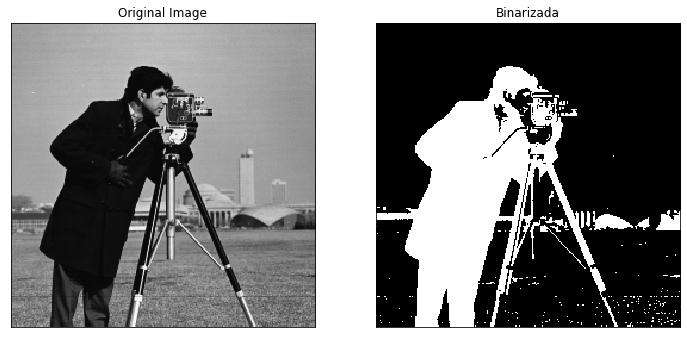

In [129]:
img = cv.imread('G:\Meu Drive\Colab\cameraman.tif')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('Binarizada'), plt.xticks([]), plt.yticks([])
plt.show()


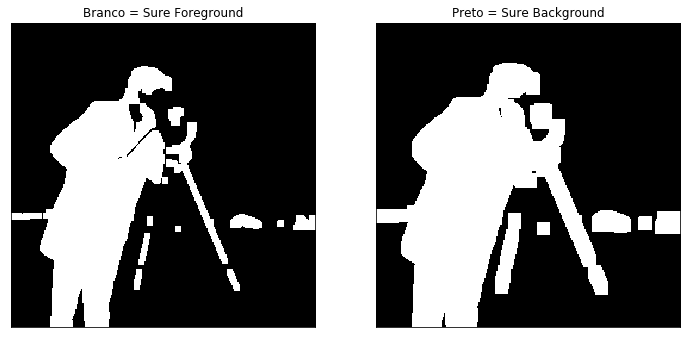

In [133]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(opening, cmap = 'gray')
plt.title('Branco = Sure Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_bg, cmap = 'gray')
plt.title('Preto = Sure Background'), plt.xticks([]), plt.yticks([])


plt.show()

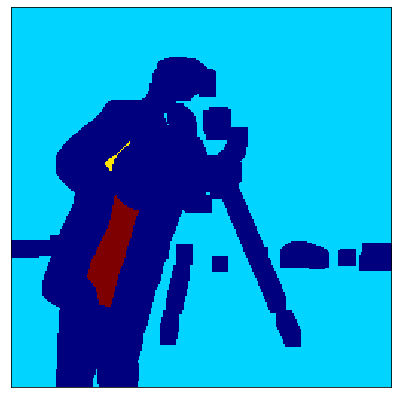

In [136]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.figure(figsize = (7,7))
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers,cmap='jet'), plt.xticks([]), plt.yticks([])
plt.show()

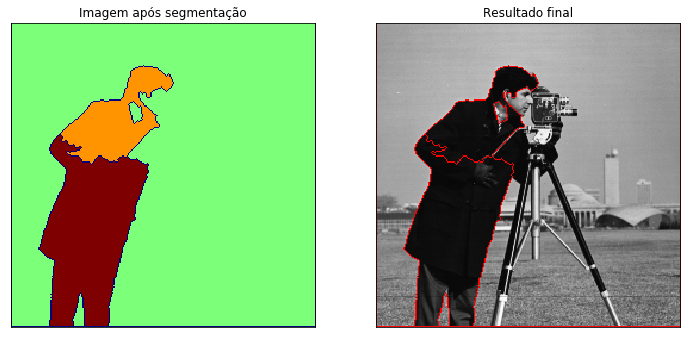

In [137]:
cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(markers, cmap = 'jet')
plt.title('Imagem após segmentação'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Resultado final'), plt.xticks([]), plt.yticks([])
plt.show()

# Peppers

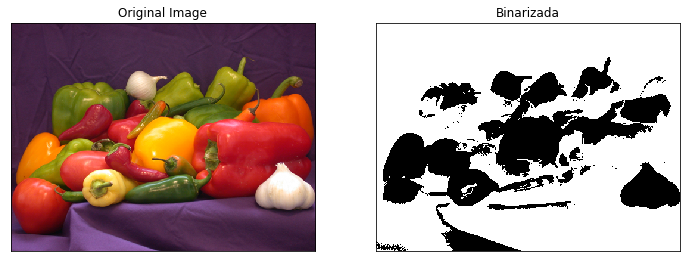

In [138]:
img = cv.imread('G:\Meu Drive\Colab\peppers.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('Binarizada'), plt.xticks([]), plt.yticks([])
plt.show()


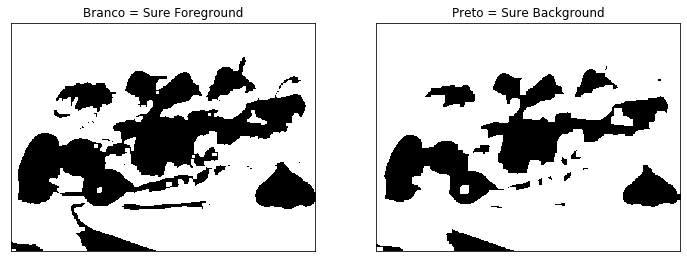

In [139]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(opening, cmap = 'gray')
plt.title('Branco = Sure Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_bg, cmap = 'gray')
plt.title('Preto = Sure Background'), plt.xticks([]), plt.yticks([])
plt.show()

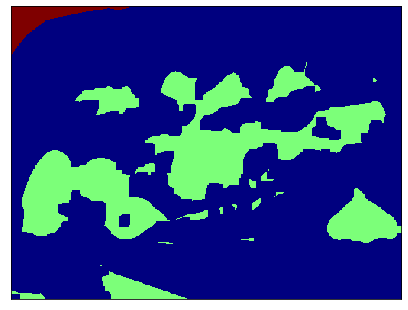

In [140]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.figure(figsize = (7,7))
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers,cmap='jet'), plt.xticks([]), plt.yticks([])
plt.show()

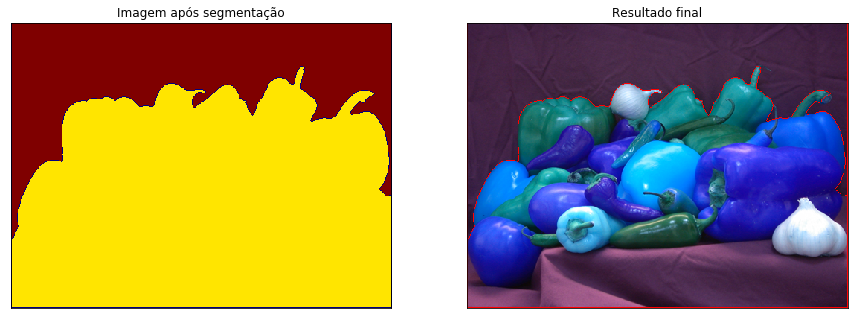

In [142]:
cv.watershed(img,markers)
img[markers == -1] = [255,0,0]


plt.figure(figsize = (15,15))
plt.subplot(121),plt.imshow(markers, cmap = 'jet')
plt.title('Imagem após segmentação'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Resultado final'), plt.xticks([]), plt.yticks([])
plt.show()

## Conclusão

Este relatório prático foi realizado como meio de avaliação da disciplina de Visão Computacional. A prática foi dividida em duas partes.

Na primeira parte, foi investigado os conceitos de gradiente e borda atrvés do método de Sobel, Lapaciano e Canny. Foram utilizadas algumas figuras coloridas e em escala de cinza. 
Nas imagens coloridas, o método Sobel apresentou melhores resultados. Além disso, é possível notar que a Sobel horizontal acentua as linhas na vertical e vice-versa.
Verificou-se que o método Laplaciano apresentou melhor resultado na figura em preto e branco. A determinação das arestas é omnidirecional, mas com alguma perda de resolução. De fato, Pode-se ver as ondulações correspondentes às arestas são mais moderadas. O detector de bordas laplaciano é extremamente sensível a ruído, isto está intrinsecamente ligado ao fato de ser baseado em 2ª derivada.

Foi empregado também o detector Canny, apresentando boa detecção e minimizando efeitos de ruídos. Verificou-se a influência do limiar no detector Canny. No limiar amplo, Fig. 5b, observou-se uma grande ruidosa oriunda das construções visto na Fig. 5a.

A segunda parte da atividade, foi investigado a segmentação de imagens pelo algoritmo Watershed. Foram utilizadas 3 figuras fornecidas para a atividade. O Watershed é utilizado para detectar e extrair objetos em imagens que tocam/sobrepõe. Na figura Coins o algoritmo identificou com perfeição os objetos. Entretanto, nas outras duas imagens, cameraman.tif e pepper.png os resultados não foram adequados. O ponto crítico deste algoritmo é a obtenção precisa dos marcadores.